In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator, NullFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpmath import *

from shabanipy.resonators.billys_code.utils.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.resonators.billys_code.utils.jy_mpl_settings.colors import line_colors

plt.style.use(jy_mpl_rc)

In [2]:
import scipy.constants as const
from mpmath import *

def gammacap(freq, EC, QC, T=12e-3, factor = 2.9):
    hbar = const.hbar  # Reduced Planck's constant (in J·s)
    h = const.h  # Planck's constant (in J·s)
    k_B = const.Boltzmann  # Boltzmann's constant (in J/K)
    return (hbar * (freq * 2 * np.pi)**2 / (8 * EC * hbar * 2 * np.pi * QC)) * (factor)**2 * (coth(hbar * freq * 2 * np.pi / (2 * k_B * T)) + 1)

def gammaind(freq, EL, QL, T=12e-3, factor = 2.9):
#     freq = 65e6
    hbar = const.hbar  # Reduced Planck's constant (in J·s)
    h = const.h  # Planck's constant (in J·s)
    k_B = const.Boltzmann  # Boltzmann's constant (in J/K)
    return (hbar * 2 * np.pi * EL / hbar /QL) * (factor)**2 * (coth(hbar * freq * 2 * np.pi / (2 * k_B * T)) + 1)

def get_phi_matelems(EJ, EC, EL, flux_list = np.linspace(0, .5, 101)):
    
    freqs, phimats = [], []

    for i in flux_list: 
        fluxonium = scq.Fluxonium(
            EJ=EJ,
            EC=EC,
            EL=EL,
            cutoff = 110,
            flux = i
        )
        f = abs(fluxonium.eigenvals()[0]-fluxonium.eigenvals()[1])
        phimat = fluxonium.matrixelement_table('phi_operator', evals_count=20)
        freqs.append(f)
        phimats.append(abs(phimat[0][1]))
        
    return np.array(freqs), np.array(phimats)

frequency at half flux = 63.92310905833459, <0|phi|1> at half flux = 2.8600951070253697


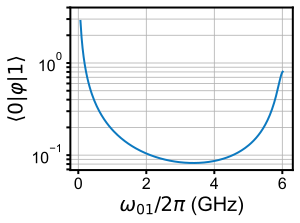

In [3]:
EC = 1e9
EL = 0.4e9
EJ = 6e9

flux_list = np.linspace(0, .5, 201)
freqs, phimats = get_phi_matelems(EJ, EC, EL, flux_list = flux_list)
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(freqs*1e-9, phimats)
plt.xlabel('$\omega_{01}/2\pi$ (GHz)')
plt.ylabel(r'$\langle 0|\varphi|1\rangle$')
plt.yscale('log')
plt.yticks([.07, .08, .09, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4])
plt.grid()
print(f'frequency at half flux = {freqs[-1]*1e-6}, <0|phi|1> at half flux = {phimats[-1]}')

max T1 is 27.9110087208706
max T1 is 197.416699070797
max T1 is 622.244218489117
max T1 is 971.367613443595


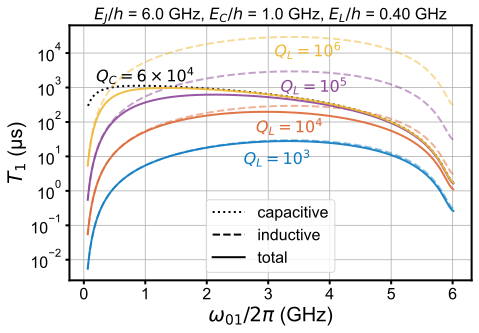

In [4]:
from matplotlib.lines import Line2D  # For creating custom legend handles

fig, ax = plt.subplots(figsize=(7,5))

T = 12e-3
QLs = [1e3, 1e4, 1e5, 1e6]
colors = ['red', 'blue', 'green']

for j, QL in enumerate(QLs):
    gammacaps = []
    gammainds = []

    QC = 64e3

    for i in range(len(flux_list)):
        gammacaps.append(gammacap(freqs[i], EC, QC, T, factor = phimats[i]))
        gammainds.append(gammaind(freqs[i], EL, QL, T, factor = phimats[i]))

    gammacaps = np.array(gammacaps)
    gammainds = np.array(gammainds)
    if j == 0:
        plt.plot(freqs*1e-9, 1/gammacaps*1e6, color = 'black', linestyle = 'dotted')

    plt.plot(freqs*1e-9, 1/gammainds*1e6, color = line_colors[j], linestyle = '--', alpha = .5)
    plt.plot(freqs*1e-9, 1/(gammainds+gammacaps)*1e6, color = line_colors[j], alpha = .9)
    
    print(f'max T1 is {max( 1/(gammainds+gammacaps)*1e6)}')
    
legend_lines = [
    Line2D([0], [0], color='black', linestyle='dotted', label=f'capacitive'),
    Line2D([0], [0], color='black', linestyle='--', label='inductive'),
    Line2D([0], [0], color='black', linestyle='-', label='total'),
]

plt.legend(handles=legend_lines , loc='lower center'
          )

plt.grid()
plt.yscale('log')
plt.ylabel('$T_1$ (µs)')
plt.xlabel('$\omega_{01}/2\pi$ (GHz)')
plt.yticks([.01, .1, 1, 10, 100, 1000, 1e4])

plt.text(.2, 1.5e3, r'$Q_C = 6 \times 10^4$')
# plt.text(.3, 1*10**3, r'$Q_C = 5 \times 10^4$')
plt.text(3.1, 8e3, r'$Q_L = 10^6$', color = line_colors[3])
plt.text(3.2, 7.5e2, r'$Q_L = 10^5$', color = line_colors[2])
plt.text(2.8, 5e1, r'$Q_L = 10^4$', color = line_colors[1])
plt.text(2.6, .6e1, r'$Q_L = 10^3$', color = line_colors[0])
plt.title(f'$E_J/h$ = {EJ*(1e-9):0.1f} GHz, $E_C/h$ = {EC*(1e-9):0.1f} GHz, $E_L/h$ = {EL*(1e-9):0.2f} GHz', fontsize = 16)

plt.tight_layout()
plt.savefig('/Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/estimated_T1.pdf', format = 'pdf')

6347050277.692566
frequency at half flux = 6347.050277692566, <0|phi|1> at half flux = 0.3074520789711841


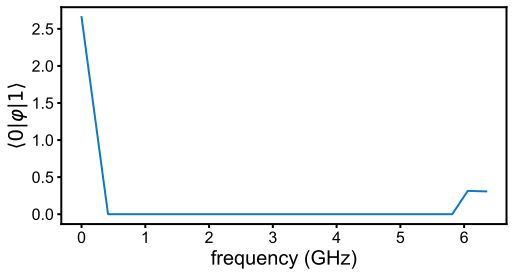

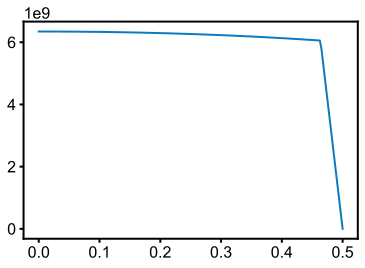

In [5]:
EC_B = 150e6
EL_B = 4.97e9
EJ_B = 30e9

flux_list = np.linspace(0, .5, 201)
freqs, phimats = get_phi_matelems(EJ_B, EC_B, EL_B, flux_list = flux_list)
print(freqs[0])
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(freqs*1e-9, phimats)
plt.xlabel('frequency (GHz)')
plt.ylabel(r'$\langle 0|\varphi|1\rangle$')

fig, ax = plt.subplots()
plt.plot(flux_list, freqs)

print(f'frequency at half flux = {freqs[0]*1e-6}, <0|phi|1> at half flux = {phimats[0]}')

freq 6.347050277692566
cap 3.32312071129931
ind 19.678856832648


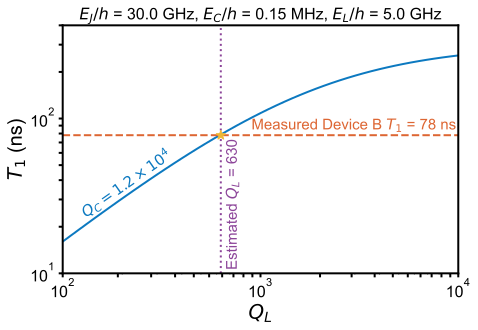

In [6]:
from matplotlib.lines import Line2D  # For creating custom legend handles
from scipy.interpolate import interp1d

T = 12e-3
QLs_B = np.logspace(1, 5, 101)
# QLs_B = np.logspace(3, 4, 3)

colors = ['red', 'blue', 'green']

T1_estimate = []

for j, QL in enumerate(QLs_B):
    gammacaps = []
    gammainds = []

    QC = 1.2e4
    for i in range(len(flux_list)):
        gammacaps.append(gammacap(freqs[i], EC_B, QC, T, factor = phimats[i]))
        gammainds.append(gammaind(freqs[i], EL_B, QL, T, factor = phimats[i]))

    gammacaps = np.array(gammacaps)
    gammainds = np.array(gammainds)
    T1_estimate.append(1/(gammainds[0]+gammacaps[0])*1e6)
    
gammacaps = []
gammainds = []

QC = 1.2e4
QL = 300
for i in range(len(flux_list)):
    gammacaps.append(gammacap(freqs[i], EC_B, QC, T, factor = phimats[i]))
#     gammainds.append(gammaind(freqs[i], EL_B, QL, T, factor = phimats[i]))
    gammainds.append(gammaind(freqs[i], EL_B, QL, T, factor = phimats[i]))

gammacaps = np.array(gammacaps)
gammainds = np.array(gammainds)
    
# fig, ax = plt.subplots()
# plt.plot(freqs, 1/gammainds*1e6, label = 'inductive')
# plt.plot(freqs, 1/gammacaps*1e6, label = 'capacitive')
# plt.legend()
print('freq', freqs[0]*1e-9)
print('cap', gammacaps[0]*1e-6)
print('ind', gammainds[0]*1e-6)

# print(1/gammacaps[0]*1e9)
# plt.yscale('log')
fig, ax = plt.subplots(figsize=(7,5))

T1_estimate = np.array(T1_estimate)
plt.yscale('log')
plt.xscale('log')
plt.plot(QLs_B, T1_estimate*1e3, label='Equivalent $Q_L$')
plt.xlabel('$Q_L$')
plt.ylabel('$T_1$ (ns)')

T1_estimate_interp = interp1d(QLs_B, T1_estimate)
# print(T1_estimate_interp(630))

plt.axhline(y=78, linestyle = '--', color = line_colors[1], label='Measured Device B $T_1$ = 78 ns')
plt.axvline(x=630, linestyle = 'dotted', color = line_colors[2], label='Equivalent $Q_L$')

plt.plot([630],[78], marker = '*', color = line_colors[3])

fontsize = 15
plt.text(900, 85, 'Measured Device B $T_1$ = 78 ns', color = line_colors[1], fontsize = fontsize)
plt.text(670, 11, 'Estimated $Q_L$ = 630', color = line_colors[2], fontsize = fontsize, rotation = 90)
plt.text(120, 23, r'$Q_C = 1.2\times 10^4$', color = line_colors[0], fontsize = fontsize, rotation = 35)


plt.yticks(list(range(10, 101, 10)) + list(range(200, 601, 100)))
plt.xticks([*np.linspace(10, 100,11)*10, *np.linspace(200, 1000,10)*10])
plt.title(f'$E_J/h$ = {EJ_B*(1e-9):0.1f} GHz, $E_C/h$ = {EC_B*(1e-9):0.2f} MHz, $E_L/h$ = {EL_B*(1e-9):0.1f} GHz', fontsize = 16)
plt.xlim(1e2, 1e4)
plt.ylim(1e1, 4e2)
plt.tight_layout()
plt.savefig('/Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/estimated_QL.pdf', format = 'pdf')
